# Исследование показателей интернет-магазина компьютерных игр

## Цель исследования

1. Исследовать основные показатели.
2. Составить портрет пользователя каждого региона.
3. Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.


### Ход исследования

В качестве исходных данных используем информацию, предоставленную интернет-магазином за 2016 год в виде таблицы в формате ".csv", описание таблицы приведем ниже.

"games.csv":
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating -Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

О качестве данных ничего не известно. Перед тем как приступить к исследованию, понадобится обзор данных и, при необходимости, предобработка.

Таким образом исследование имеет следующие этапы:

- Обзор данных.
- Предобработка данных.
- Исследование основных показателей.
- Составление портрета пользователей каждого региона (NA, EU, JP).
- Проверка гипотез.
- Вывод.

## Обзор данных

### Получение данных

Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
# импортируем необходимые модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib.pyplot import figure

Ячейка для выравнивания всех таблиц markdown:

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
# создаем датафрейм из файла .csv
games = pd.read_csv('games.csv')

### Общая информация

Выведем первые строки датафрейма и получим общую информацию.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**

- В 6 столбцах имеются пропуски: 
`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
- В названиях столбцов используется верхний и нижний регистр.
- Информация имеет неоптимальный / неправильный тип данных:

| Название столбца | Текущий тип данных | Необходимый тип данных |
| :-- | :-- | :-- |
| Year_of_Release   | float64 | int64 |
| User_Score | object | float64 |




## Предобработка данных

### Изменение названий столбцов

Для удобства приведем названия всех столбцов к единому нижнему регистру.

In [6]:
# применим метод lower() ко всем столбцам
games.columns = [x.lower() for x in games.columns]

# проверим, изменились ли названия столбцов, выведем информацию о таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов приведены к нижнему регистру.

### Изменение типов данных

В столбце `'year_of_release'` изменим тип данных с `float64` на `int64` для удобства чтения и вычислений, поскольку год - это всегда целое число.

In [7]:
print('Среднее значение столбца до изменения:', games['year_of_release'].mean().round(3))
print('Число пропусков до изменения:', games['year_of_release'].isna().sum())

# изменим тип данных
games['year_of_release'] = games['year_of_release'].astype('Int64')

print('Среднее значение столбца после изменения:', games['year_of_release'].mean().round(3))
print('Число пропусков после изменения:', games['year_of_release'].isna().sum())

Среднее значение столбца до изменения: 2006.485
Число пропусков до изменения: 269
Среднее значение столбца после изменения: 2006.485
Число пропусков после изменения: 269


В столбце `'user_score'` изменим тип данных с `object` на `float64` для возможности производить вычисления с этими данными.

В столбце присутствует значние `"tbd"`, которые мешает изменению типа данных.

Что значит `"tbd"`?

Рейтинг Tbd (To be determined) игр — это система оценки и ранжирования видеоигр, которые еще находятся в разработке или вышли недавно и пока не имеют достаточного количества оценок и отзывов от игроков и критиков.

In [8]:
# выведем часть таблицы с этими значениями
games.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [9]:
# выясним количество значений "tbd", запишем в переменную "a"
a = games.query('user_score == "tbd"')['user_score'].count()
print('Число "tbd" до изменения:', a)

# выясним число пропусков в 'user_score', запишем в переменную "b"
b = games['user_score'].isna().sum()
print('Число пропусков до изменения:', b)

Число "tbd" до изменения: 2424
Число пропусков до изменения: 6701


Количество значений "tbd" составляет 14,5% от общего числа строк. Для возможности изменения типа столбца вместо "tbd" присвоим значения "NaN". Это не повлияет на качество информации, поскольку "tbd" по смыслу является аналогом "NaN".

Изменение типа проведем в 2 этапа:
- Заменим значения `"tbd"` на `"NaN"`.
- Приведем столбец к типу `Float64`.

In [10]:
# заменим "tbd" на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

# приведем тип данных к Float64
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce').astype('float64')

# выясним число пропусков в 'user_score' после изменения, запишем в переменную "с"
c = games['user_score'].isna().sum()

if a + b == c:
    print('Число пропусков после изменения = число пропусков до изменения + число "tbd"')
    print(f'{c} = {a} + {b}')
    print(f'Изменение прошло корректно')
else:
    print('Число пропусков после изменения != число пропусков до изменения + число "tbd"')
    print(f'{c} != {a} + {b}')
    print(f'Изменение прошло НЕкорректно')


# выведем часть таблицы 
games.head()

Число пропусков после изменения = число пропусков до изменения + число "tbd"
9125 = 2424 + 6701
Изменение прошло корректно


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# проверим типы данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Вывод:**

Типы данных в столбцах изменены, ошибок не обнаружено.

### Обработка пропусков

Выведем процент пропусков в каждом столбце.

In [12]:
print('Процент пропусков по столбцам:')
pd.DataFrame(round(games.isna().mean()*100,10).sort_values(ascending=False)).style.background_gradient('coolwarm')

Процент пропусков по столбцам:


,0
user_score,54.591684
critic_score,51.319174
rating,40.478612
year_of_release,1.609333
name,0.011965
genre,0.011965
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


In [13]:
# число строк до удаления пропусков
a = games.shape[0]
print('Число строк до удаления пропусков:', a)

Число строк до удаления пропусков: 16715


Удалим строки с пропущенными значениями в столбцах: `'genre'`, `'name'`, `'year_of_release'`, поскольку в сумме таких значений менее 2% и их удаление не окажет существенного влияния на качество данных.

In [14]:
# удаление строк с пропусками
games = games.dropna(subset=['genre',
                             'name',
                             'year_of_release',
                            ])

In [15]:
# выведем информацию об измененной таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [16]:
# число строк после удаления пропусков
b = games.shape[0]
print(f'Число строк сократилось на {round(a/b*100 -100, 2)} %:')

Число строк сократилось на 1.65 %:


In [17]:
print('Процент пропусков по столбцам:')
pd.DataFrame(round(games.isna().mean()*100,10).sort_values(ascending=False)).style.background_gradient('coolwarm')

Процент пропусков по столбцам:


,0
user_score,54.615665
critic_score,51.453418
rating,40.598395
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


**Вывод:**

В данных присутствует значительное число пропусков. 
Это может быть связано со следующим:

- В столбцах `'user_score'`, `'critic_score'` и `'rating'` ряд игр могут фактически не иметь оценок и рейтинга. Часть пропусков (2424 шт.) в столбце `'user_score'` появилась в результате удаления значений `"tbd"` (см. п. 3.3).

- Пропуски в столбцах `'genre'`, `'name'`, `'year_of_release'` не выглядят естественными и нормальными, поскольку для каждой из игр эта информация должна существовать. Вероятно, эти пропуски связаны со следующим: 
- - технический сбой; 
- - ошибка загрузки из БД;
- - информация изначально не была внесена в БД (человеческий фактор).
- - игра имеет несколько жанров, а столбец `'genre'` предполагает только одно значение.

Пропуски в столбцах `'genre'`, `'name'`, `'year_of_release'` полностью удалены. Столбцы `'user_score'`, `'critic_score'`, `'rating'` содержат от 41 % до 55 % пропусков, их удаление может значительно повлиять на результаты анализа, поэтому удалять их не будем.

### Обработка дубликатов

**Проверим датафрейм на явные дубликаты.**

In [18]:
# выведем количество явных дубликатов
games.duplicated().sum()

0

Явных дубликатов не обнаружено.

**Проверим данные на наличие неявных дубликатов.**

In [19]:
# выведем часть таблицы 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [20]:
# выведем количество уникальных значений столбцов
print('Количество уникальных значений в столбцах')
for i in ['name', 'platform', 'genre', 'rating']:
    print (f'{i:9}: {games[i].nunique()}')

Количество уникальных значений в столбцах
name     : 11426
platform : 31
genre    : 12
rating   : 8


**Проверим на наличие неявных дубликатов столбец `'rating'`.**

In [21]:
# уникальные значения столбца 'rating'
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Рейтинг от организации ESRB (англ. Entertainment Software Rating-Board):

- `«E»` («Everyone») — для всех;
- `«T»` («Teen») — подросткам 13—19 лет;
- `«M»` («Mature») — от 17 лет;
- `«E10+»` («Everyone 10 and older») — для всех старше 10 лет;
- `«EC»` («Early childhood») — для детей младшего возраста;
- `«K-A»` («Kids to Adults») — для детей и взрослых.
- `«AO»` («Adults Only 18+») — только для взрослых. 
- `«RP»` ( «Rating Pending»») — рейтинг ожидается.

Рейтинг `«K-A»` использовался до 1998 года, затем был переименован в `«E»`. Заменим рейтинг `«K-A»` на `«E»`. Остальные значения рейтинга корректны и актуальны.


In [22]:
print('Размеры таблицы до изменения:', games.shape)

# заменим значения
games['rating'] = (
    games['rating']
    .replace('K-A', 'E', regex=True)
)

print('Размеры таблицы после изменения:', games.shape)

Размеры таблицы до изменения: (16444, 11)
Размеры таблицы после изменения: (16444, 11)


In [23]:
# уникальные значения столбца 'rating'
games['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Рейтинг `'K-A'` переименован, количество значений с рейтингом `'E'` увеличилось. Дубликаты успешно устранёны.

**Проверим на наличие неявных дубликатов столбец `'genre'`.**

In [24]:
# уникальные значения столбца 'genre'
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Значения жанров выглядят корректно.

**Проверим на наличие неявных дубликатов столбец `'platform'`.**

In [25]:
# уникальные значения столбца 'platform'
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Среди названий платформ дубликатов не обнаружено.

**Вывод:**

Дубликаты удалены.

### Добавление нового столбца

Посчитаем суммарные продажи во всех регионах и запишем их в новый столбец `'sum_sales'`.

In [26]:
# создаём столбец
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1).astype('float64')

# выведем таблицу
games.head()    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


Столбец с суммарными продажами `'sum_sales'` создан.

**Вывод:**

Предобработка данных завершена:
- обработали дубликаты;
- изменили типы данных в столбцах;
- добавили новый столбец.

Данные готовы для анализа.

## Исследование основных показателей

В ходе исследования выясним следующее:
- Количество игр, которое выпускалось в разные годы.
- Как менялись продажи по платформам?
- Чего ожидать от продаж в следующем году: роста или падения?
- Как влияют на продажи игр отзывы пользователей и критиков?
- Распределение игр по жанрам. Самые прибылиные жанры.


###  Количество игр, которое выпускалось в разные годы

Сгруппируем данные по годам и выведем на графике количество игр, выпущенных в каждом году.

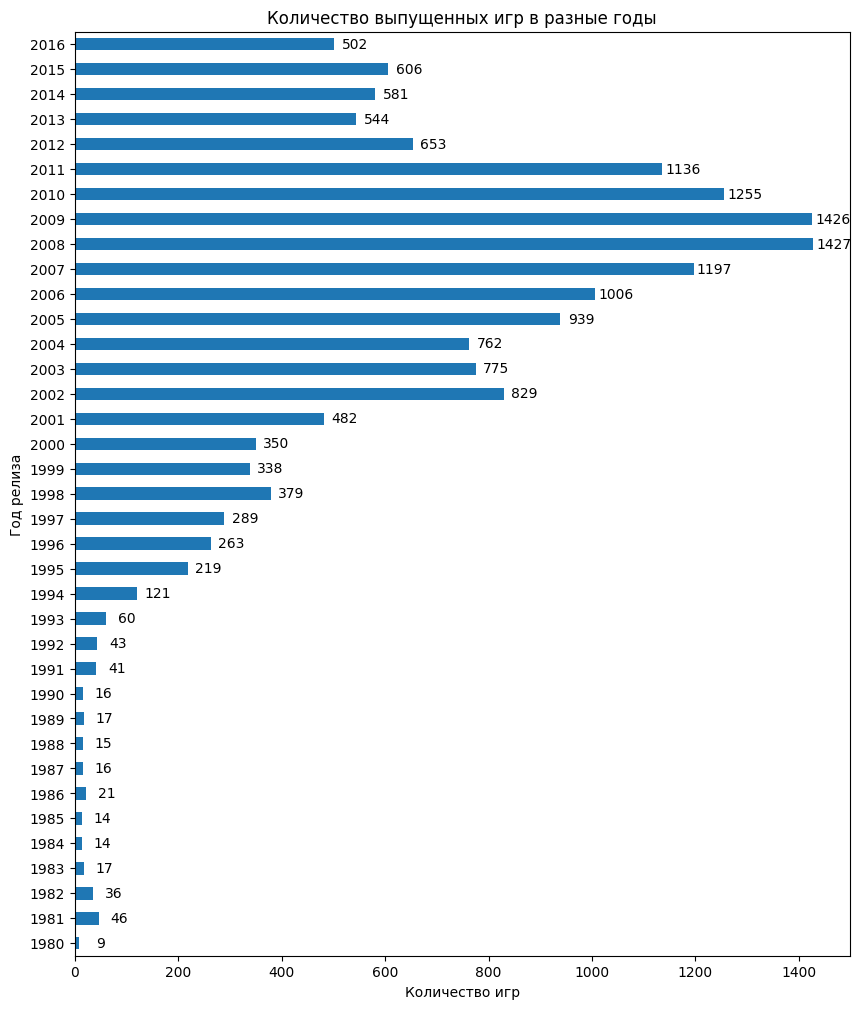

In [28]:
# сгруппируем данные по году релиза и построим столбчатую диаграмму
ax=(games.groupby('year_of_release')['year_of_release']
    .count()
    .sort_index()
    .plot(kind='barh')
   )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 40, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');

plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('Количество игр')
plt.ylabel('Год релиза')

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(10, 12) 

plt.show()

In [29]:
# выведем информацию по сгруппированым данным
games.groupby('year_of_release')['year_of_release'].count().describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

**Вывод:**

Данные представлены периодом начиная с 1980 по 2016 год включительно (37 лет). При этом имеется незначительное число релизов до 1990 года включительно. Наиболее важны для исследования данные с 1991 по 2016 год.

Максимальные продажи зафиксированы в 2008-2009 гг. В 2016 году наблюдается продолжение тенденции падения продаж. 

### Как менялись продажи по платформам

Для начала рассмотрим, как менялись общие продажи по годам.

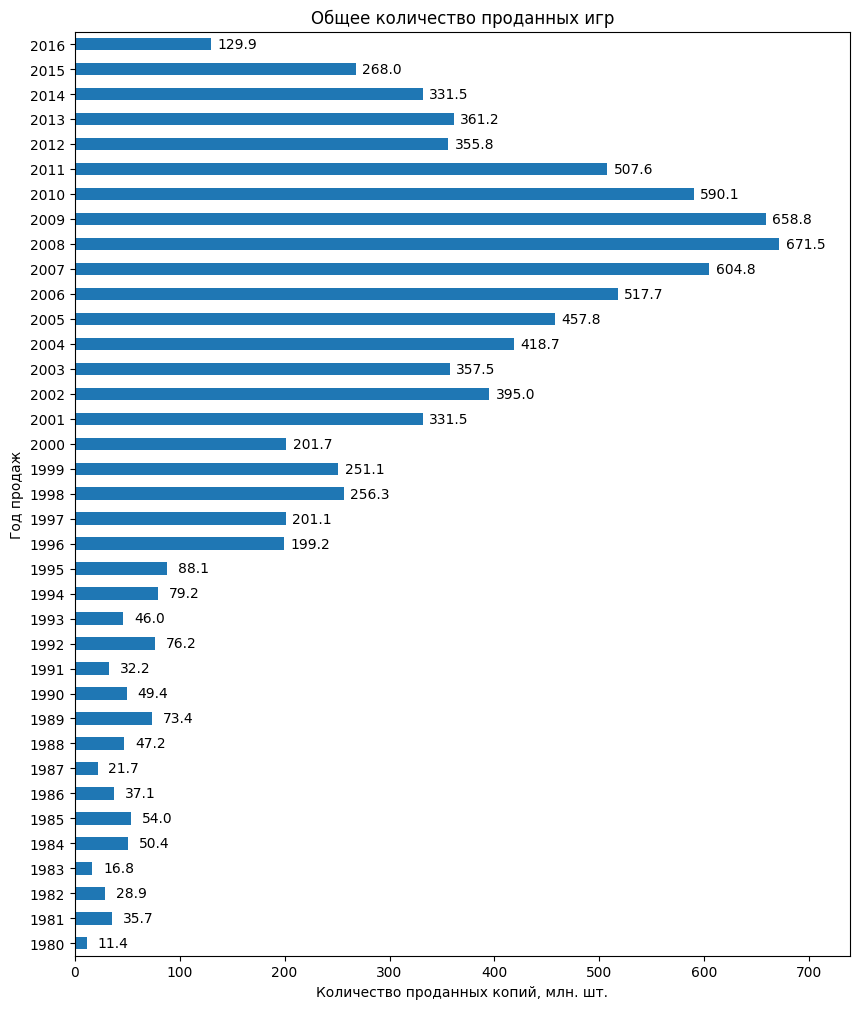

In [30]:
# сгруппируем данные по году релиза и построим столбчатую диаграмму
ax=(games.groupby('year_of_release')['sum_sales']
    .sum()
    .round(1)
    .sort_index()
    .plot(kind='barh')
   )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 25, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');

plt.title('Общее количество проданных игр')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Год продаж')

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(10, 12) 

# увеличиваем расстояние до края
plt.margins(0.10)

plt.show()

Падение продаж идет параллельно с падением числа релизов. Пик продаж наблюдался в 2008 году, затем тренд на снижение. 2016 год выдался исключительно неблагоприятным для игровой индустрии, меньшие продажи зафиксированы в 1995 году и ранее.

Сгруппируем данные по названию платформ и выведем на графике суммарные продажи игр для каждой платформы.

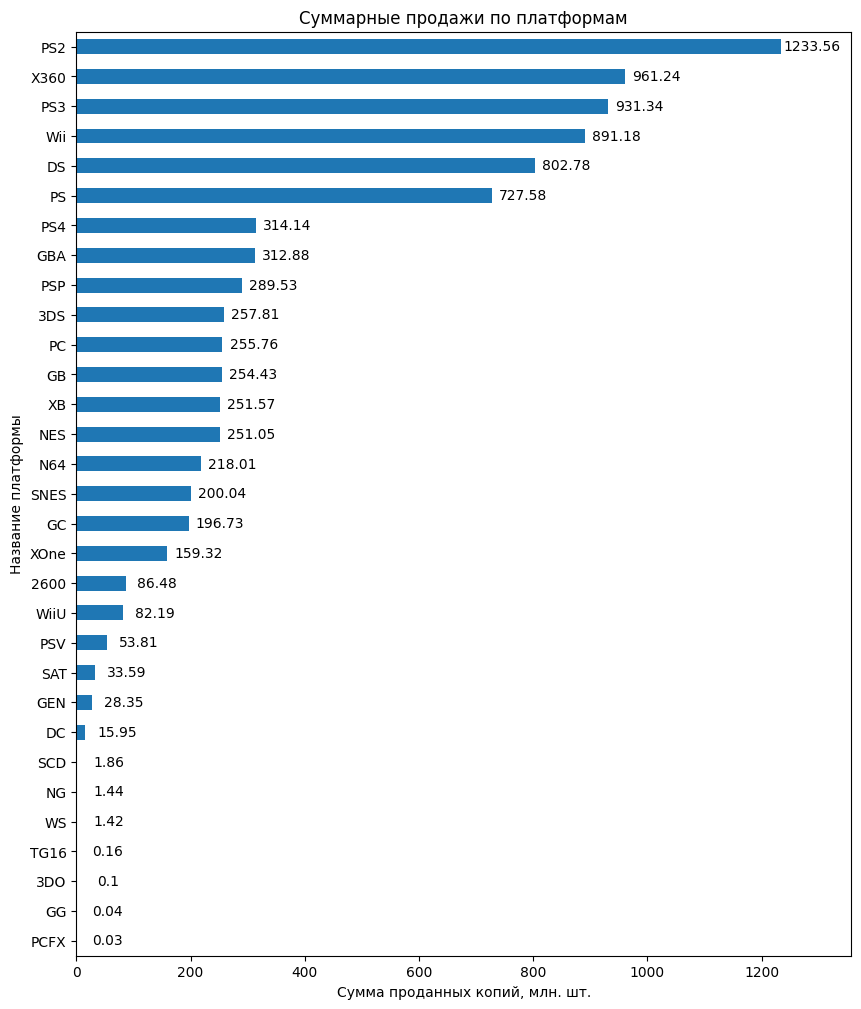

In [31]:
# сгруппируем данные по платформе и построим столбчатую диаграмму
ax=(games.groupby('platform')['sum_sales']
    .sum()
    .round(2)
    .sort_values()
    .plot(kind='barh')
   )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 55, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');

plt.title('Суммарные продажи по платформам')
plt.xlabel('Сумма проданных копий, млн. шт.')
plt.ylabel('Название платформы')

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(10, 12) 

# увеличиваем расстояние до края
plt.margins(0.1)

plt.show()

На графике видно, что некоторые платформы не обрели популярность и имеют незначительные продажи. Например, семь нижних столбцов, где продажи от 0.03 до 1,86 млн. копий.

Для 6 платформ, лидирующих по суммарным продажам построим распределение продаж по годам.

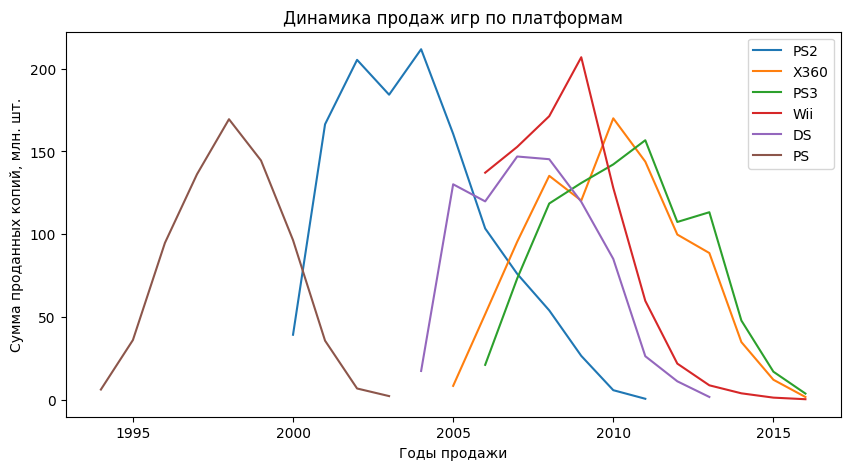

In [32]:
# для платформ из списка построим график 
list_ = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

def sales_dynamics(platforms, release_from):
    # для каждой платформы производим группировку по году и суммируем общие продажи
    for i in platforms:
        a = (games
            .query('platform == @i and year_of_release >= @release_from')
            .groupby('year_of_release')['sum_sales']
            .sum())
        
        # строим график кажой платформы
        plt.plot(a)    
        
    plt.title('Динамика продаж игр по платформам')
    plt.ylabel('Сумма проданных копий, млн. шт.')
    plt.xlabel('Годы продажи')
             
    # настраиваем размер графика
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    
    # подписываем значения
    plt.legend(platforms)
    
    plt.show()

sales_dynamics(list_, 1991)

**Вывод:**

По графику прослеживается характерный срок существования платформы: примерно 10 лет. Это срок с момента старта продаж и набора популярности до полного спада. 

Примечательны пересечения графиков для платформ: PS, PS2, PS3. В момент снижения продаж приставки PlayStation выпускалась очередная обновлённая версия этой платформы, и продажи старой и новой приставок какое-то время шли вместе, таким образом компания Sony стабилизирует выручку.

### Прогноз роста продаж на следующий год

Опираясь из наблюдения из предыдущих пунктов, сделаем прогноз роста на следующий год (2017): для каких платформ ожидается рост продаж игр?

Критерии отбора платформы:

- В год появления платформы продажи не могут быть нулевыми, если даже платформа не очень успешна, всё равно минимальные продажи есть. Поэтому рассмотрим платформы, для которых за 2016 год продажи игр не равны нулю. 
- Исключим платформы, для которых продажи игр ведутся уже более 5 лет кроме PC, поскольку персональные компьютеры постоянно модернизируются. 

In [33]:
# формируем series с платформами, игры для которых продавались в 2016 году
a = (games
    .query('year_of_release >= 2016')
    .groupby('platform')['sum_sales']
    .sum())

# формируем series с платформами, игры для которых продавались ранее 2011 года
b = (games
    .query('year_of_release < 2012')
    .groupby('platform')['sum_sales']
    .sum())

# исключим из 'a' платформы, содержащиеся в 'b' и добавим 'PC'
# сохраним список в переменной platforms и выведем на экран
platforms = list(a[~a.index.isin(b.index)].index) + ['PC']
print(platforms)

['PS4', 'WiiU', 'XOne', 'PC']


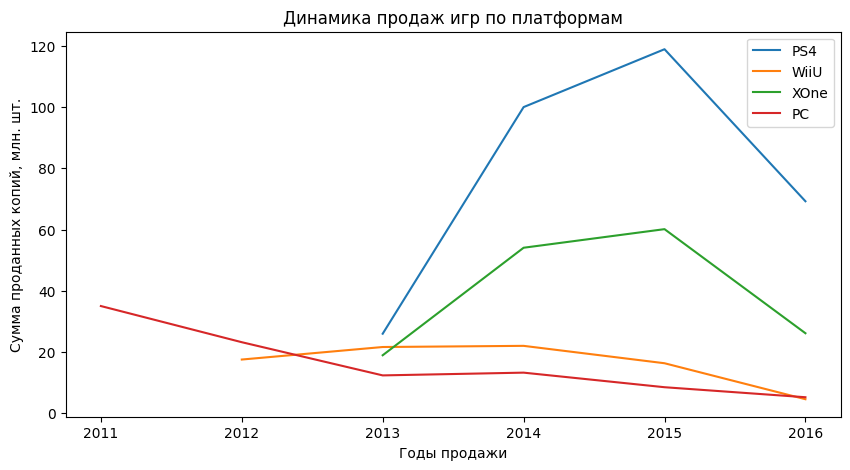

In [34]:
# построим график, используя ранее созданную функцию
sales_dynamics(platforms, 2011)

Посмотрим основные статистические показатели по продажам на выбранных платформах и построим диаграмму размаха.

In [35]:
# продажи на выбранных платформах
games.query('platform == @platforms').groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,957.0,0.267252,0.679745,0.01,0.02,0.05,0.170,8.01
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.525,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


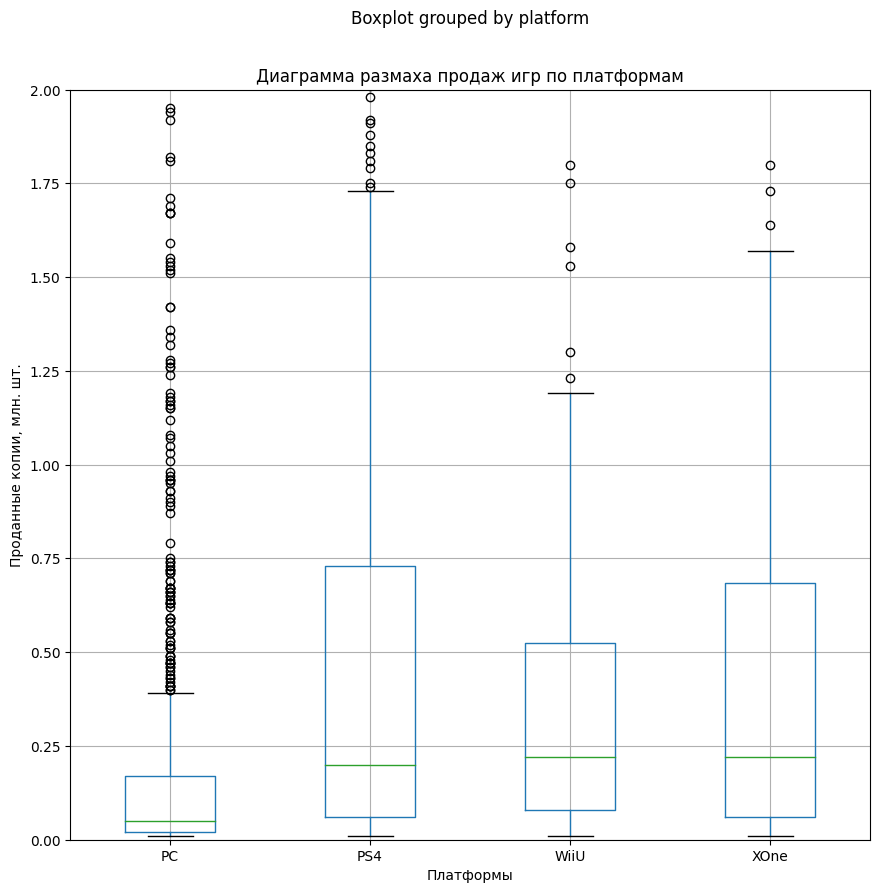

In [36]:
# построим диаграмму размаха общих продаж на выбранных платформах
(games
.query('platform == @platforms')
.boxplot(column='sum_sales', by='platform')
)
# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(10, 10) 

plt.title('Диаграмма размаха продаж игр по платформам')
plt.ylabel('Проданные копии, млн. шт.')
plt.xlabel('Платформы')

# ограничим число выбросов на графике
plt.ylim(0,2)

plt.show()

**Вывод:**

Исходя из графика "Динамика продаж игр по платформам" нельзя выделить растущие продажи ни по одной из платформ. Идет тенденция к сокращению, вероятно, вслед за рынком вцелом. 

Можно предположить, что на рынке в ближайшие годы появятся новые платформы с новыми возможностями, что подтолкнет продажи. Стоит обратить внимание прежде всего на платформы PS4 и XOne, и их следующие версии. В случае общего подъёма рынка есть вероятность роста продаж игр для этих платформ на некоторое время 1-2 года, затем снижение продаж по мере устаревания платформ. Если же подъёма рынка не будет, то вероятно продажи игр для данных платформ продолжат снижаться до выхода следующих обновлённых версий.

PS4 и XOne и WiiU имеют относительно высокие медианные значения продаж игр по сравнению с PC. Но WiiU по абсолютному значению суммы продаж значительно отстаёт от PS4 и XOne даже при более длительном присутствии на рынке.

### Влияние отзывов на продажи

Рассмотрим, как влияют на продажи отзывы пользователей и критиков. Для анализа рассмотрим ранее популярную платформу PS2.
- Построим диаграммы рассеяния.
- Вычислим коэффициенты корреляции.
- Соотнесём полученные результаты с продажами игр на других платформах.

**Зависимость продаж от отзывов пользователей**

In [37]:
# построим диаграмму рассеяния, вычислим коэффициент корреляции Пирсона 
# создадим функцию с параметрами:
#     platform - название платформы: 'PC'
#     x - название столбца по оси X: 'critic_score'
#     title - название диаграммы: 'Сумма продаж - оценка критиков'  
#     xlabel - подпись оси X: 'Оценка критиков'

def scatter_sales(platform, x, title, xlabel):
    # строим точечную диаграмму
    (games
     .loc[games['platform'] == platform]
     .plot(x, y='sum_sales', kind='scatter', figsize=(5,5)) 
    )
    
    plt.title(f'Платформа: {platform}\nДиаграмма рассеяния:\n"{title}"')
    plt.xlabel(xlabel)
    plt.ylabel('Сумма продаж, млн. копий')
    
    plt.show()
    
    # вычисляем коэффициент корреляции Пирсона
    corr = (games
            .loc[games['platform'] == platform, x]
            .corr(games.loc[games['platform'] == platform, 'sum_sales'])
            .round(2))
       
    print(f'Коэффициент корреляции Пирсона: {corr}')

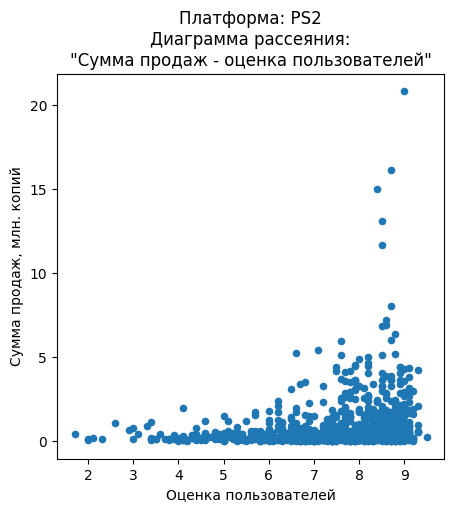

Коэффициент корреляции Пирсона: 0.18


In [38]:
scatter_sales('PS2', 'user_score', 'Сумма продаж - оценка пользователей', 'Оценка пользователей')

**Вывод:**

Наблюдаем слабую положительную корреляцию между общим количеством продаж и оценкой пользователей.

**Зависимость продаж от оценки критиков**

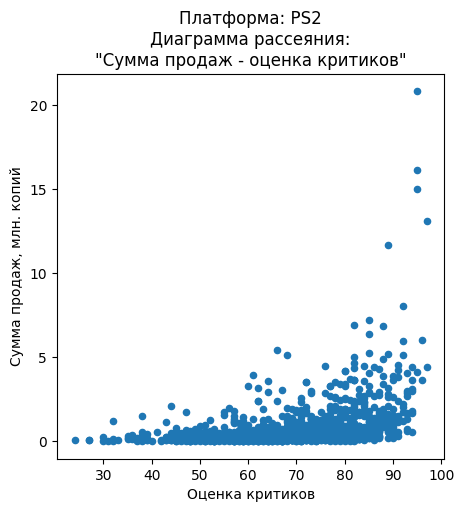

Коэффициент корреляции Пирсона: 0.39


In [39]:
scatter_sales('PS2', 'critic_score', 'Сумма продаж - оценка критиков', 'Оценка критиков')

**Вывод:**

Наблюдаем умеренную положительную корреляцию между общим количеством продаж и оценкой критиков.

**Рассмотрим оценки пользователей и критиков для актуальных на 2016 год платформ.**

Для платформ PS4 и XOne построим точечные диаграммы и вычислим коэффициент корреляции Пирсона, используя ранее созданную функцию `"scatter_sales()"`.

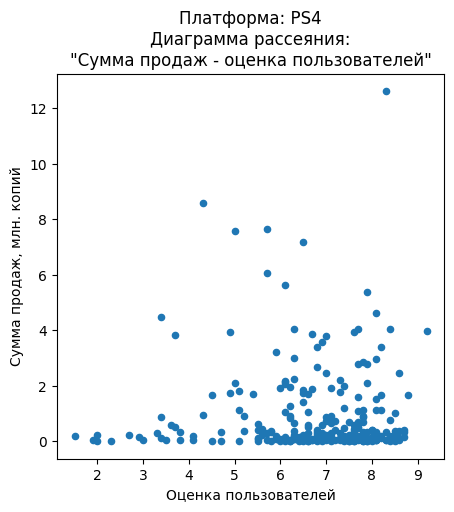

Коэффициент корреляции Пирсона: -0.03


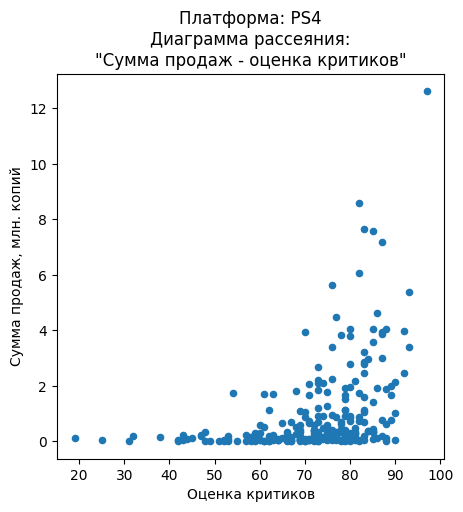

Коэффициент корреляции Пирсона: 0.41


In [40]:
# Платформа PS4
scatter_sales('PS4', 'user_score', 'Сумма продаж - оценка пользователей', 'Оценка пользователей')
scatter_sales('PS4', 'critic_score', 'Сумма продаж - оценка критиков', 'Оценка критиков')

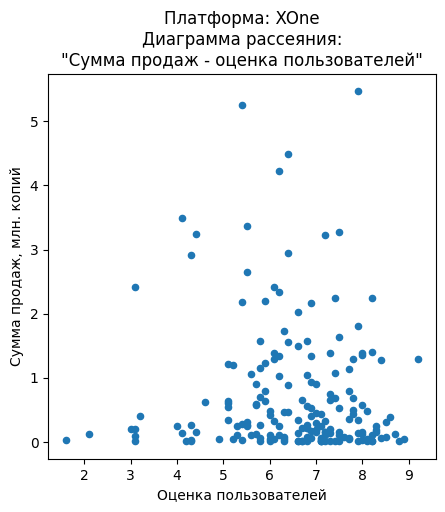

Коэффициент корреляции Пирсона: -0.07


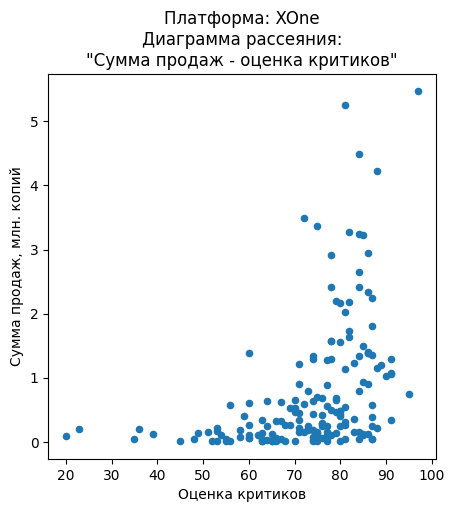

Коэффициент корреляции Пирсона: 0.42


In [41]:
# Платформа XOne
scatter_sales('XOne', 'user_score', 'Сумма продаж - оценка пользователей', 'Оценка пользователей')
scatter_sales('XOne', 'critic_score', 'Сумма продаж - оценка критиков', 'Оценка критиков')

In [42]:
# сделаем срез данных по актуальным платформам, сгруппируем данные по платформам 
# выведем средние оценки пользователей и критиков
(games
 .query('platform == @platforms')
 .groupby('platform')[['user_score', 'critic_score']]
 .mean()
 .round(2)
 .sort_values(by='critic_score', ascending=False)
)

,user_score,critic_score
platform,,
PC,7.07,75.93
XOne,6.52,73.33
PS4,6.75,72.09
WiiU,6.90,70.73


**Вывод:**

Среди актуальных платформ игры на XOne и PS4 находятся на среднем уровне по оценки критиков, что неплохо. Корреляция между отзывами пользователей и количеством продаж игр для этих платформ практически отсутствует, зато есть умеренная положительная корреляция между количеством продаж и отзывами критиков (более 0,4), что важно учитывать при планировании продаж. 

### Распределение игр по жанрам

Сгруппируем данные по жанрам. Построим график распределения количества игр по жанрам и количеству продаж.


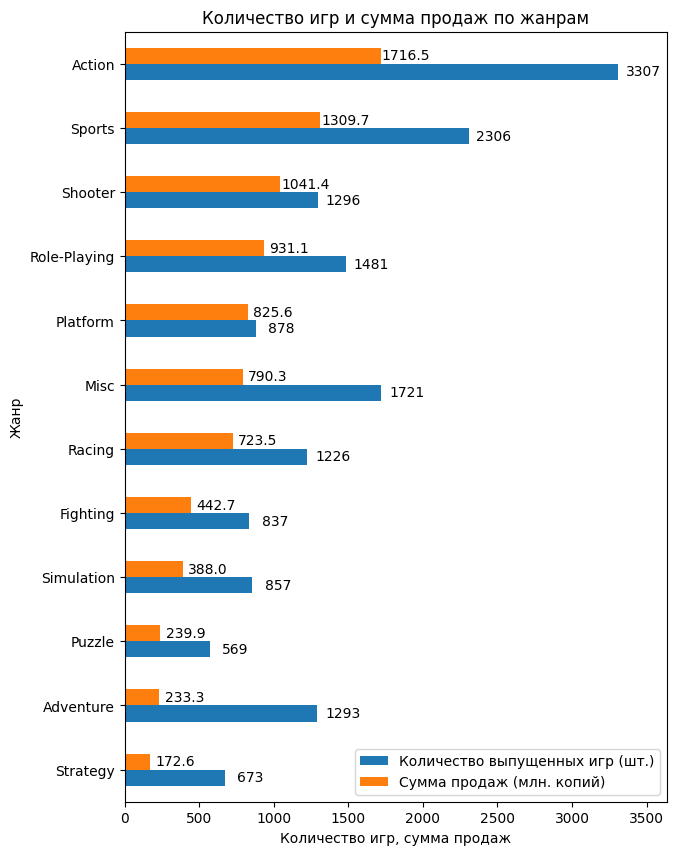

In [43]:
# сгруппируем данные по жанрам и построим столбчатую диаграмму
ax=(games.groupby('genre')[['genre', 'sum_sales']]
    .agg({'genre':'count', 'sum_sales':'sum'}) 
    .round(1)
    .sort_values(by='sum_sales')
    .plot(kind='barh')
   )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 170, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');
    
plt.title('Количество игр и сумма продаж по жанрам')
plt.xlabel('Количество игр, сумма продаж')
plt.ylabel('Жанр')

# увеличиваем расстояние до края
plt.margins(0.1)

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(7, 10) 

# редактируем легенду
plt.legend(['Количество выпущенных игр (шт.)', 'Сумма продаж (млн. копий)'])

plt.show()

Определим медианные продажи игр для каждого жанра. 

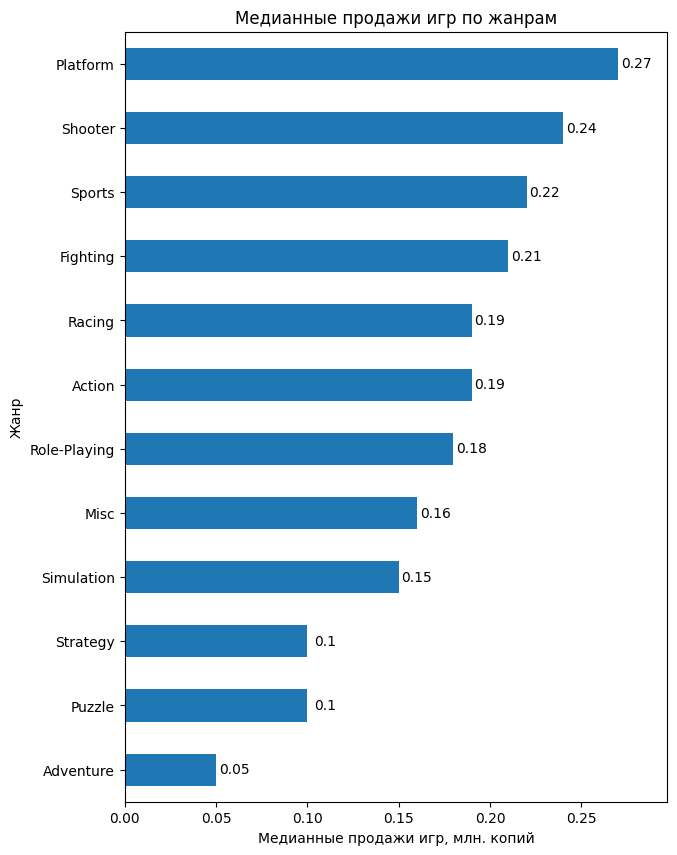

In [44]:
# сгруппируем данные по жанрам и построим столбчатую диаграмму
ax=((games.groupby('genre')['sum_sales'])
    .median()
    .round(3)
    .sort_values()
    .plot(kind='barh')
   )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 0.01, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');
    
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Медианные продажи игр, млн. копий')
plt.ylabel('Жанр')

# увеличиваем расстояние до края
plt.margins(0.1)

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(7, 10) 

# редактируем легенду
#plt.legend(['Количество выпущенных игр (шт.)', 'Сумма продаж (млн. копий)'])

plt.show()

**Вывод:**

Сымый популярный жанр - Action. Он лидирует как по количеству выпущенных игр, так и по сумме проданных копий. Тем не менее, по медианным продажам Action занимает среднее положение. Самый высокий показатель медианных продаж в жанре Platfofm, что делает продажи игр более предсказуемыми. 

Самый непопулярный жанр по общему числу продаж - Strategy. Самые низкие мединанные продажи игр в жанре Adventure. Примечательно, что в жанре Advanture было выпущено значительное число игр, но при этом суммарные продажи на низком уровне.

Таким образом, при планировании продаж следует учитывать не только абсолютное число проданных копий по жанрам, но и влияние на продажи отдельных самых популярных игр. Медианные продажи позволяют исключить такие выбросы и выбрать жанры с наиболее стабильными и предсказуемыми продажами.

##  Портрет пользователя

Составим портрет пользователя для каждого региона: NA, EU, JP по следующим признакам:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).

Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

### ТОП-5 игровых платформ по регионам

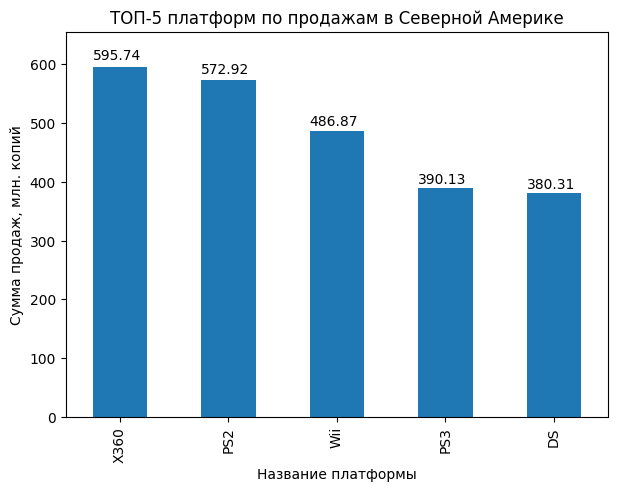

In [45]:
# создадим функцию для построения "ТОП-5" - графиков, в качестве аргументов передаем:
# group_col - имя столбца по которому производим группировку: '...'
# values_col -  имя столбца, значения которого аггрегируем: '...'
# name - название диаграммы: '...'
# xlabel - подпись оси X: '...'

def top_5(group_col, values_col, name, xlabel):

    # Сгруппируем данные по платформам, вычислим сумму продаж для региона.
    ax = (games.groupby(group_col)[values_col]
                .sum()
                .sort_values(ascending=False)
                .round(2)
                .head()
                .plot(kind='bar')
               )
        
    # подписываем и расставляем значения столбцов
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.02))
           
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel('Сумма продаж, млн. копий')
    
    # увеличиваем расстояние до края
    plt.margins(0.10)
    
    # настраиваем размер графика
    fig = plt.gcf()
    fig.set_size_inches(7, 5) 
    
    plt.show()

# построим график для ТОП-5 платформ по продажам в Северной америке    
top_5('platform', 
      'na_sales', 
      'ТОП-5 платформ по продажам в Северной Америке',
      'Название платформы'
     )

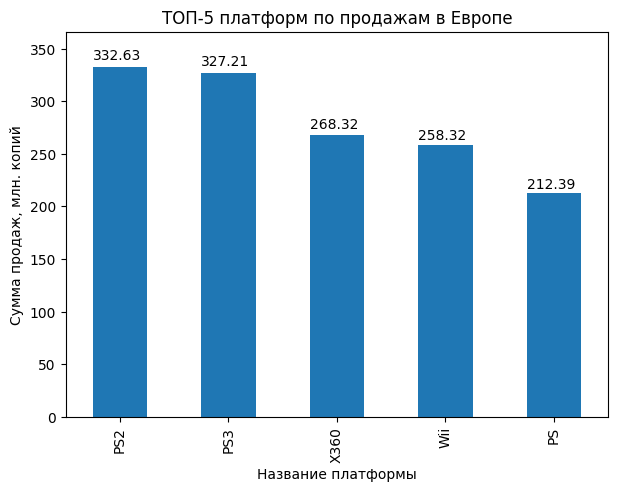

In [46]:
# построим график для ТОП-5 платформ по продажам в Европе   
top_5('platform', 
      'eu_sales', 
      'ТОП-5 платформ по продажам в Европе',
      'Название платформы')

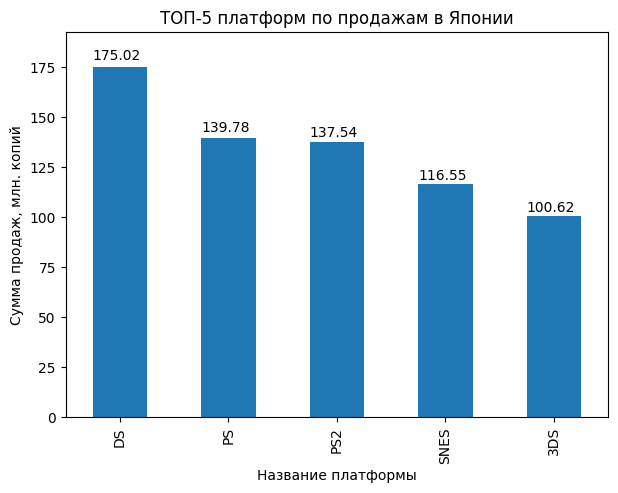

In [47]:
# построим график для ТОП-5 платформ по продажам в Японии   
top_5('platform', 
      'jp_sales', 
      'ТОП-5 платформ по продажам в Японии',
      'Название платформы')

**Вывод:**

В разных регионах предпочитают играть на разных платформах. Так на первом месте по продажам игр:
- в Северной америке - X360;
- в Европе - PS2;
- в Японии - DS.

### ТОП-5 игровых жанров по регионам

По аналогии с п.п.5.1 построим графики ТОП-5 игровых жанров для трёх регионов.

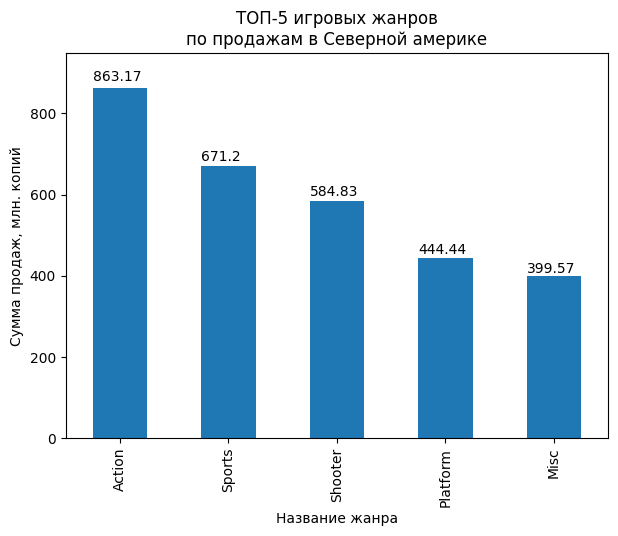

In [48]:
# построим график для ТОП-5 игровых жанров по продажам в Северной америке   
top_5('genre', 
      'na_sales', 
      'ТОП-5 игровых жанров\nпо продажам в Северной америке',
      'Название жанра')

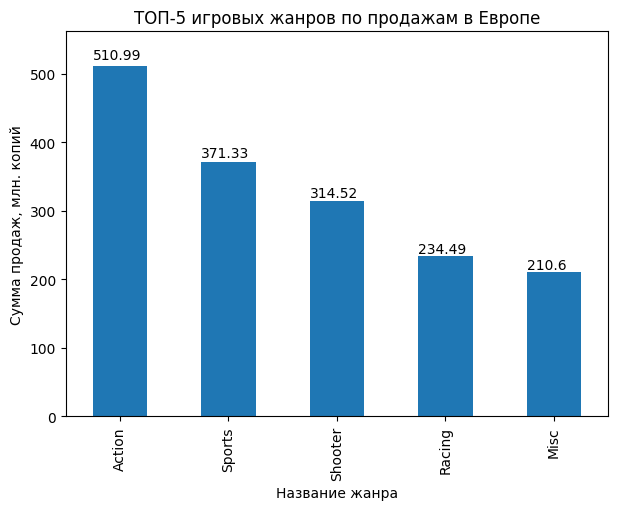

In [49]:
# построим график для ТОП-5 игровых жанров по продажам в Европе  
top_5('genre', 
      'eu_sales', 
      'ТОП-5 игровых жанров по продажам в Европе',
      'Название жанра')

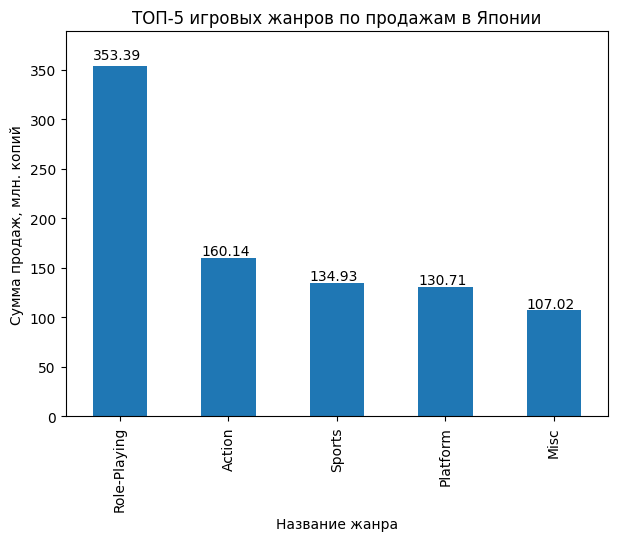

In [50]:
# построим график для ТОП-5 игровых жанров по продажам в Японии  
top_5('genre', 
      'jp_sales', 
      'ТОП-5 игровых жанров по продажам в Японии',
      'Название жанра')

**Вывод:**

В Северной америке и Европе предпочтения по жанрам близки: самый популярный жанр - Action, в то время как в Японии - Role-Playing (причём с большим отрывом от остальных жанров). При этом Role-Playing вообще отсутствует среди ТОП-5 жанров Северной америки и Европы.

Чем может быть обусловлено такое различие? Основной рынок сбыта в Северной америке - США. Европа и США близки по культуре, поскольку население США изначально формировалось переселенцами из Европы.

Япония, в свою очередь, азиатская страна с самобытной культурой, это может сказываться в том числе и на предпочтениях в игровых жанрах. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

Определим зависимость рейтинга ESRB и продаж в каждом из рассматриваемых регионов.

In [51]:
# получим список всех вариантов рейтинга ESRB и выведем на экран
games.rating.value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

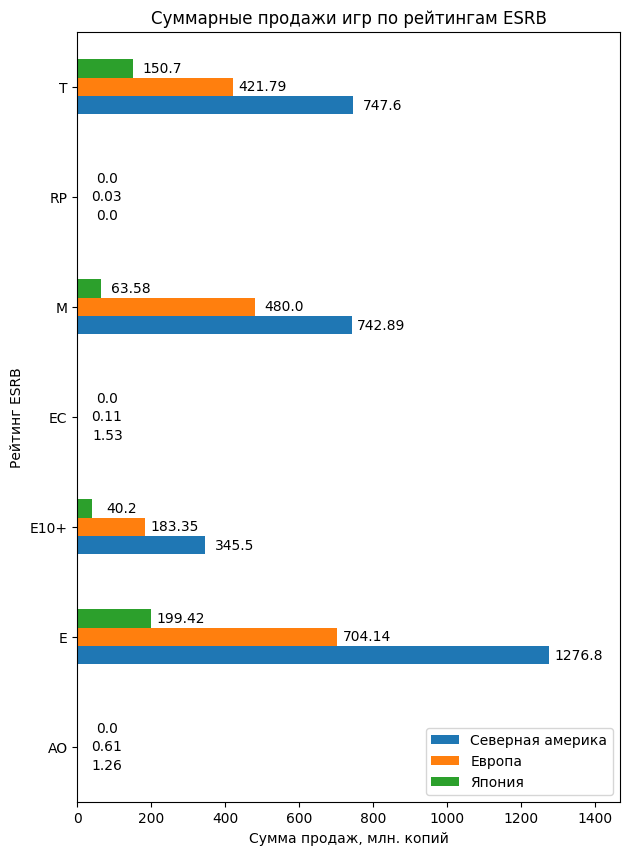

In [52]:
# cгруппируем данные по рейтингу, суммируем данные по продажам в каждом регионе
ax = (games
      .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
      .sum()
      .round(2)
      .plot(kind='barh')
     )

# подписываем и расставляем значения столбцов
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() + 80, p.get_y() + p.get_height() * 0.5), 
                ha='center', 
                va='center', 
                color='black');
       
plt.title('Суммарные продажи игр по рейтингам ESRB')
plt.xlabel('Сумма продаж, млн. копий')
plt.ylabel('Рейтинг ESRB')

# увеличиваем расстояние до края
plt.margins(0.15)

# настраиваем размер графика
fig = plt.gcf()
fig.set_size_inches(7, 10)

# редактируем легенду
plt.legend([
     'Северная америка', 
     'Европа',
     'Япония'],
      loc='lower right')

plt.show()

Вспомним значения рейтингов:
- «E» («Everyone») — для всех;
- «T» («Teen») — подросткам 13—19 лет;
- «M» («Mature») — от 17 лет;
- «E10+» («Everyone 10 and older») — для всех старше 10 лет;
- «EC» («Early childhood») — для детей младшего возраста;
- «AO» («Adults Only 18+») — только для взрослых.
- «RP» ( «Rating Pending»») — рейтинг ожидается.

**Вывод:**

- Максимальные продажи во всех рассмотренных регионах наблюдаем для игр с рейтингом "E". Это игры, предназначенные для широкой аудитории.
- Игры с рейтингом "M" и "T" в Северной америке и Европе имеют схожие объёмы продаж. В Японии продажи игр с рейтингом "T" более чем в 2 раза превышают продажи игр с рейтингом "M". Вероятно это связано с отличающимися жанровыми предпочтениями японской аудитории.
- Игры для самых маленьких "EC", а так же только для взрослой аудитории (18+) "AO" составляют незначительный объем продаж, а в Северной америке и вовсе нулевой.

Таким образом, при планировании продаж, необходимо учитывать целевую аудиторию, чтобы чётко понимать, какой рейтинг будет присвоен игре и на каком рынке такую игру эффективнее продавать.

## Проверка гипотез

###  Гипотеза №1

**Гипотеза:**

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

Чтобы подтвердить или опровергнуть данное предположение, нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.

**Нулевая гипотеза:**

*Средние пользовательские рейтинги платформ Xbox One и PC равны.*

**Альтернативная гипотеза:**

*Средние пользовательские рейтинги платформ Xbox One и PC не равны.*

Для проверки гипотезы воспользуемся методом из библиотеки scipy.

Получим 2 набора значений для анализа:
- пользовательские рейтинги платформы Xbox One;
- пользовательские рейтинги платформы PC.

In [53]:
# выведем информацию о первом датасете (пользовательские рейтинги Xbox One)
set_1 = games.query('platform == "XOne"')['user_score']
print('Кол. значений:', set_1.count())
print('Кол. пропусков:', set_1.isna().sum())

Кол. значений: 182
Кол. пропусков: 65


In [54]:
# избавимся от пропусков и проверим информацию снова
set_1 = set_1.dropna()
print('Кол. значений:', set_1.count())
print('Кол. пропусков:', set_1.isna().sum())

Кол. значений: 182
Кол. пропусков: 0


In [55]:
# вычислим дисперсию 
set_1.var()

1.9069968429360695

Набор данных `'set_1'` (пользовательские рейтинги Xbox One) готов к анализу.

In [56]:
# выведем информацию о втором датасете (пользовательские рейтинги PC)
set_2 = games.query('platform == "PC"')['user_score']
print('Кол. значений:', set_2.count())
print('Кол. пропусков:', set_2.isna().sum())

Кол. значений: 755
Кол. пропусков: 202


In [57]:
# избавимся от пропусков и проверим информацию снова
set_2 = set_2.dropna()
print('Кол. значений:', set_2.count())
print('Кол. пропусков:', set_2.isna().sum())

Кол. значений: 755
Кол. пропусков: 0


In [58]:
# вычислим дисперсию 
set_2.var()

2.349224375076853

Набор данных `'set_2'` (пользовательские рейтинги PC) готов к анализу.

Поскольку есть сомнения в полноте данных, к тому же часть значений пропущена, будем считать, что мы имеем дело с выборками, а не с самими генеральными совокупностями.

Мы имеем две выборки разных размеров и, судя по вычисленным дисперсиям, есть основания полагать, что дисперсии и у генеральных совокупностей различаются, следовательно при вызове метода `scipy.stats.ttest_ind()` передадим параметр `equal_var=False`.

In [59]:
# зададим уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.01 

# вычислим p-value
results = st.ttest_ind(set_1, set_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


**Вывод:**

На имеющихся данных, на уровне значимости 1% (уровне доверия 99%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги платформ Xbox One и PC не равны.

### Гипотеза №2

**Гипотеза:**

*Средние пользовательские рейтинги жанров Action и Sports разные.*

Чтобы подтвердить или опровергнуть данное предположение, нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.

**Нулевая гипотеза:**

*Средние пользовательские рейтинги жанров Action и Sports равны.*

**Альтернативная гипотеза:**

*Средние пользовательские рейтинги жанров Action и Sports не равны.*

Для проверки гипотезы воспользуемся методом из библиотеки scipy.

Получим 2 набора значений для анализа:
- пользовательские рейтинги жанра Action;
- пользовательские рейтинги жанра Sports.

In [60]:
# выведем информацию о первом датасете (пользовательские рейтинги жанра Action)
set_3 = games.query('genre == "Action"')['user_score']
print('Кол. значений:', set_3.count())
print('Кол. пропусков:', set_3.isna().sum())

Кол. значений: 1796
Кол. пропусков: 1511


In [61]:
# избавимся от пропусков и проверим информацию снова
set_3 = set_3.dropna()
print('Кол. значений:', set_3.count())
print('Кол. пропусков:', set_3.isna().sum())

Кол. значений: 1796
Кол. пропусков: 0


In [62]:
# вычислим дисперсию 
set_3.var()

2.027493768262496

Набор данных `'set_3'` (пользовательские рейтинги жанра Action) готов к анализу.

In [63]:
# выведем информацию о втором датасете (пользовательские рейтинги жанра Sports)
set_4 = games.query('genre == "Sports"')['user_score']
print('Кол. значений:', set_4.count())
print('Кол. пропусков:', set_4.isna().sum())

Кол. значений: 1081
Кол. пропусков: 1225


In [64]:
# избавимся от пропусков и проверим информацию снова
set_4 = set_4.dropna()
print('Кол. значений:', set_4.count())
print('Кол. пропусков:', set_4.isna().sum())

Кол. значений: 1081
Кол. пропусков: 0


In [65]:
# вычислим дисперсию 
set_4.var()

2.623055812519272

Набор данных `'set_4'` (пользовательские рейтинги жанра Sports) готов к анализу.

Поскольку есть сомнения в полноте данных, к тому же часть значений пропущена, будем считать, что мы имеем дело с выборками, а не с самими генеральными совокупностями.

Мы имеем две выборки разных размеров и, судя по вычисленным дисперсиям, есть основания полагать, что дисперсии и у генеральных совокупностей различаются, следовательно при вызове метода `scipy.stats.ttest_ind()` передадим параметр `equal_var=False`.

In [66]:
# зададим уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.01 

# вычислим p-value
results = st.ttest_ind(set_3, set_4, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

На имеющихся данных, на уровне значимости 1% (уровне доверия 99%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги жанров Action и Sports равны.

## Вывод

**В ходе исследования мы провели следующую работу:**
- изучили данные, проверили их на предмет аномалий и несоответствий;
- подготовили данные для анализа: обработали дубликаты, изменили типы данных в столбцах, добавили новый столбец;
- исследовали основные параметры интернет-магазина компьютерных игр: 
- - количество игр, выпускаемых в разные годы;
- - как менялись продажи по платформам;
- - влияние отзывов на продажи;
- - распределение игр по жанрам;
- сделали прогноз продаж на следующий год;
- составили портрет пользователей для трёх регионов;
- проверили две гипотезы;

**В результате установили:**

- Данные представлены периодом с 1980 по 2016 гг. включительно (37 лет). До 1990 года ежегодное число игровых релизов было незначительным. С 1991 по 2009 гг. произошел рост числа ежегодных релизов более чем в 30 раз (с 41 до 1426 релизов в год). Максимальные продажи зафиксированы в 2008 гг., затем наступил длительный спад, в 2016 году наблюдается продолжение падения продаж и параллельно сокращается выпуск новых игр. 

- Характерный срок существования платформы приблизительно 10 лет. Это срок с момента старта продаж игр и набора популярности платформы до полного прекращения продаж.

- Можно предположить, что на рынке в ближайшие годы появятся новые платформы с новыми возможностями, что подтолкнет продажи. Стоит обратить внимание прежде всего на платформы PS4 и XOne, и их следующие версии. В случае общего подъёма рынка есть вероятность роста продаж игр для этих платформ на некоторое время 1-2 года, затем снижение продаж по мере устаревания платформ. Если же подъёма рынка не будет, то вероятно продажи игр для данных платформ продолжат снижаться до выхода следующих обновлённых версий.

- Наблюдаем слабую положительную корреляцию между общим количеством продаж и оценкой пользователей и умеренную положительную корреляцию между общим количеством продаж и оценкой критиков. Получается, что оценка критиков с точки зрения продаж важнее, чем оценка пользователей.

- Сымый популярный жанр - Action. Он лидирует как по количеству выпущенных игр, так и по сумме проданных копий. Тем не менее, по медианным продажам Action занимает среднее положение. Самый высокий показатель медианных продаж в жанре Platfofm, что делает продажи игр более предсказуемыми. Самый непопулярный жанр по общему числу продаж - Strategy. Самые низкие мединанные продажи игр в жанре Adventure. Примечательно, что в жанре Advanture было выпущено значительное число игр, но при этом суммарные продажи на низком уровне. Таким образом, при планировании продаж следует учитывать не только абсолютное число проданных копий по жанрам, но и влияние на продажи отдельных самых популярных игр. Медианные продажи позволяют исключить такие выбросы и выбрать жанры с наиболее стабильными и предсказуемыми продажами.

**Портрет среднего пользователя**

| Место жительства | Любимая платформа | Любимый жанр |
| :-- | :-- | :-- |
| Северная америка   | X360 | Action |
| Европа | PS2 | Action |
| Япония | DS | Role-Playing |

Влияние рейтинга ESRB:

- Максимальные продажи во всех рассмотренных регионах наблюдаем для игр с рейтингом "E". Это игры, предназначенные для широкой аудитории.
- Игры с рейтингом "M" и "T" в Северной америке и Европе имеют схожие объёмы продаж. В Японии продажи игр с рейтингом "T" более чем в 2 раза превышают продажи игр с рейтингом "M". Вероятно это связано с отличающимися жанровыми предпочтениями японской аудитории.
- Игры для самых маленьких "EC", а так же только для взрослой аудитории (18+) "AO" составляют незначительный объем продаж, а в Северной америке и вовсе нулевой.

Таким образом, при планировании продаж, для каждого региона необходимо учитывать:
- возраст целевой аудитории; 
- жанровые предпочтения;
- какие платформы популярны; 
- оценку игровых критиков.

**В ходе проверки гипотез появились основания утверждать:**
- cредние пользовательские рейтинги платформ Xbox One и PC не равны;
- средние пользовательские рейтинги жанров Action и Sports равны.